In [1]:
import pandas as pd

In [23]:
df = pd.read_csv("gtm-ndvi-adm2-full.csv")
df.shape

(247260, 7)

In [6]:
df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,vim,vim_avg,viq
0,2002-07-01,65298,GT1802,5.0,0.7442,0.7380,100.7902
1,2002-07-11,65298,GT1802,5.0,0.7446,0.7394,100.6574
2,2002-07-21,65298,GT1802,5.0,0.7452,0.7423,100.3636
3,2002-08-01,65298,GT1802,5.0,0.7461,0.7456,100.0641
4,2002-08-11,65298,GT1802,5.0,0.7476,0.7490,99.8260


In [9]:
df.n_pixels.unique()

array([  5.,  20.,  37.,   1.,   2.,   7.,   6.,  19.,  22.,  10.,   4.,
        11.,  14.,  18.,   8.,  15.,   3.,   9.,  12.,  13.,  26.,  16.,
        17.,  23.,  25.,  76.,  45.,  30.,  21.,  44.,  33.,  51.,  78.,
        43.,  41., 119.,  64., 275., 229.,  65.,  83., 104.,  82.,  80.,
        29.,  31.])

In [26]:
a = df.ADM2_PCODE.unique()
len(a)

315

In [17]:
max([int(x[4:6]) for x in a])

32

In [35]:
c = pd.read_csv("guatemala_lat_lon.csv")
c.head()

,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,x,y
0,Guatemala,GT,Chimaltenango,GT04,Acatenango,GT0411,Acatenango,NaN,NaN,-90.956307,14.547826
1,Guatemala,GT,Jutiapa,GT22,Agua Blanca,GT2204,Agua Blanca,NaN,NaN,-89.599949,14.458206
2,Guatemala,GT,Huehuetenango,GT13,Aguacatán,GT1327,Aguacatan,NaN,NaN,-91.213843,15.333277
3,Guatemala,GT,Quetzaltenango,GT09,Almolonga,GT0913,Almolonga,NaN,NaN,-91.484486,14.811737
4,Guatemala,GT,Sacatepéquez,GT03,Alotenango,GT0314,Alotenango,NaN,NaN,-90.819675,14.459525


In [47]:
c = c[["ADM2_PCODE", "ADM1_ES", "ADM2_ES", "x", "y"]]
c.rename(columns={"ADM1_ES": "epartamento", "ADM2_ES": "municipio", "x":"lat", "y": "lon"}, inplace=True)
c.head()

,ADM2_PCODE,epartamento,municipio,lat,lon
0,GT0411,Chimaltenango,Acatenango,-90.956307,14.547826
1,GT2204,Jutiapa,Agua Blanca,-89.599949,14.458206
2,GT1327,Huehuetenango,Aguacatán,-91.213843,15.333277
3,GT0913,Quetzaltenango,Almolonga,-91.484486,14.811737
4,GT0314,Sacatepéquez,Alotenango,-90.819675,14.459525


In [48]:
merged = df.merge(c, "inner", on="ADM2_PCODE")
merged.head()

,date,adm2_id,ADM2_PCODE,n_pixels,vim,vim_avg,viq,epartamento,municipio,lat,lon
0,2002-07-01,65298,GT1802,5.0,0.7442,0.7380,100.7902,Izabal,Lívingston,-89.151105,15.777356
1,2002-07-11,65298,GT1802,5.0,0.7446,0.7394,100.6574,Izabal,Lívingston,-89.151105,15.777356
2,2002-07-21,65298,GT1802,5.0,0.7452,0.7423,100.3636,Izabal,Lívingston,-89.151105,15.777356
3,2002-08-01,65298,GT1802,5.0,0.7461,0.7456,100.0641,Izabal,Lívingston,-89.151105,15.777356
4,2002-08-11,65298,GT1802,5.0,0.7476,0.7490,99.8260,Izabal,Lívingston,-89.151105,15.777356


In [59]:
merged.describe()

,adm2_id,n_pixels,vim,vim_avg,viq,lat,lon
count,247260.000000,247260.000000,247260.000000,247260.000000,247260.000000,247260.000000,247260.000000
mean,65486.766562,11.470032,0.714613,0.711850,100.406993,-90.825680,14.930007
std,4840.581411,24.794153,0.112596,0.111838,3.430295,0.802953,0.598018
min,64843.000000,1.000000,0.247500,0.267600,73.404700,-92.119786,13.910458
25%,64928.000000,2.000000,0.648700,0.644400,98.814400,-91.533353,14.549615
50%,65018.000000,5.000000,0.753200,0.749800,100.275400,-90.898669,14.823235
75%,65098.000000,10.000000,0.801100,0.797800,101.889725,-90.203816,15.197355
max,115000.000000,275.000000,0.897400,0.869600,132.333500,-88.490611,17.489473


In [49]:
df.shape, merged.shape

((247260, 7), (247260, 11))

In [50]:
merged.to_csv("ndvi-completo.csv")

In [51]:
import seaborn as sns 

In [60]:
g = merged.groupby(by="ADM2_PCODE").mean()
g.head()

/var/folders/sg/bv36hz0d5z36h52fqpd37kn80000gn/T/ipykernel_97527/4262659441.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = merged.groupby(by="ADM2_PCODE").mean()


,adm2_id,n_pixels,vim,vim_avg,viq,lat,lon
ADM2_PCODE,,,,,,,
GT0100,65296.0,1.0,0.585042,0.587484,99.628383,-90.548878,14.435029
GT0101,64843.0,6.0,0.495123,0.496676,99.773380,-90.479418,14.635431
GT0102,64844.0,2.0,0.649319,0.646884,100.383455,-90.465079,14.564392
GT0103,64845.0,5.0,0.750327,0.746919,100.447673,-90.346363,14.554316
GT0104,64846.0,2.0,0.653033,0.651860,100.150563,-90.372463,14.793193


<Axes: xlabel='lat', ylabel='lon'>

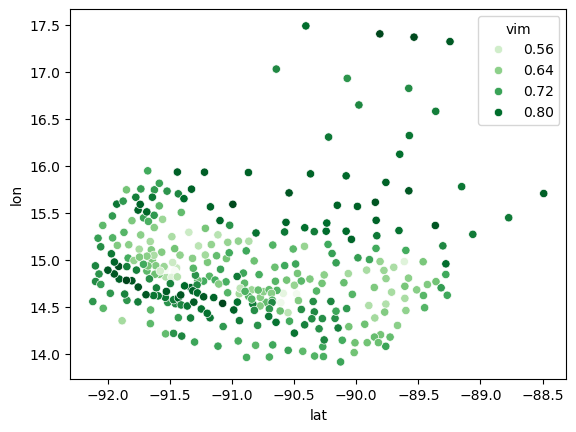

In [69]:
sns.scatterplot(g, x="lat", y="lon", hue="vim", palette=sns.color_palette("Greens", as_cmap=True))